In [1]:
!pip install autogluon.tabular[all]

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor

directory = ''          # Copy file path from Kaggle

train = TabularDataset(directory + 'train.csv')
test = TabularDataset(directory + 'test.csv')

In [3]:
!pip install autogluon.eda

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 4.3 MB/s eta 0:00:0000:01


In [4]:
import numpy as np

In [5]:
# use this for datasets with more columns, to print all columns
# (beware, if might raise memory errors when trying to print the text features values!)
# np.set_printoptions(threshold=np.inf) 

# This prints the column labels of the dataframe
print('All dataset columns:')
print(train.columns.values)

# This prints the column labels of the features identified as numerical
print('Numerical columns:')
print(train.select_dtypes(include=np.number).columns.values)

# This prints the column labels of the features identified as numerical
print('Categorical columns:')
print(train.select_dtypes(include='object').columns.values)

All dataset columns:
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Numerical columns:
['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
Categorical columns:
['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


**`train_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,special_types
Age,714,88,,,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0,float64,177,0.198653,float,
Cabin,204,147,B96 B98,4,,,,,,,,object,687,0.771044,object,
Embarked,889,3,S,644,,,,,,,,object,2,0.002245,object,
Fare,891,248,,,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292,float64,,,float,
Name,891,891,"Braund, Mr. Owen Harris",1,,,,,,,,object,,,object,text
Parch,891,7,,,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0,int64,,,int,
PassengerId,891,891,,,446.0,257.353842,1.0,223.5,446.0,668.5,891.0,int64,,,int,
Pclass,891,3,,,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0,int64,,,int,
Sex,891,2,male,577,,,,,,,,object,,,object,
SibSp,891,7,,,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0,int64,,,int,


**`test_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,special_types
Age,332,79,,,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0,float64,86,0.205742,float,
Cabin,91,76,B57 B59 B63 B66,3,,,,,,,,object,327,0.782297,object,
Embarked,418,3,S,270,,,,,,,,object,,,object,
Fare,417,169,,,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292,float64,1,0.002392,float,
Name,418,418,"Kelly, Mr. James",1,,,,,,,,object,,,object,text
Parch,418,8,,,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0,int64,,,int,
PassengerId,418,418,,,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0,int64,,,int,
Pclass,418,3,,,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0,int64,,,int,
Sex,418,2,male,266,,,,,,,,object,,,object,
SibSp,418,7,,,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0,int64,,,int,


**Types warnings summary**

,train_data,test_data,warnings
Survived,int,--,warning


### Feature Distance

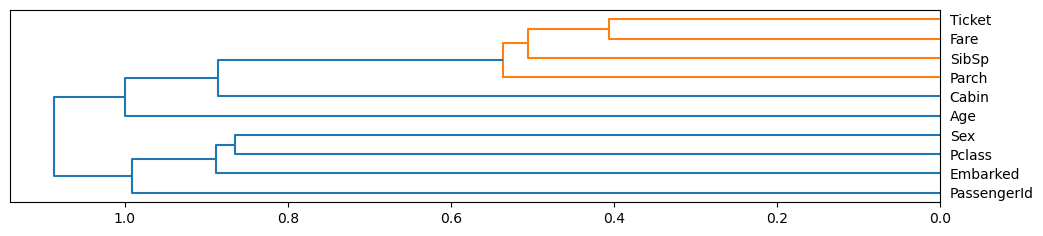

In [7]:
import autogluon.eda.auto as auto

label = 'Survived'

auto.dataset_overview(train_data=train, test_data=test, label=label)

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
Survived,891,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0,int64,2,,,int,


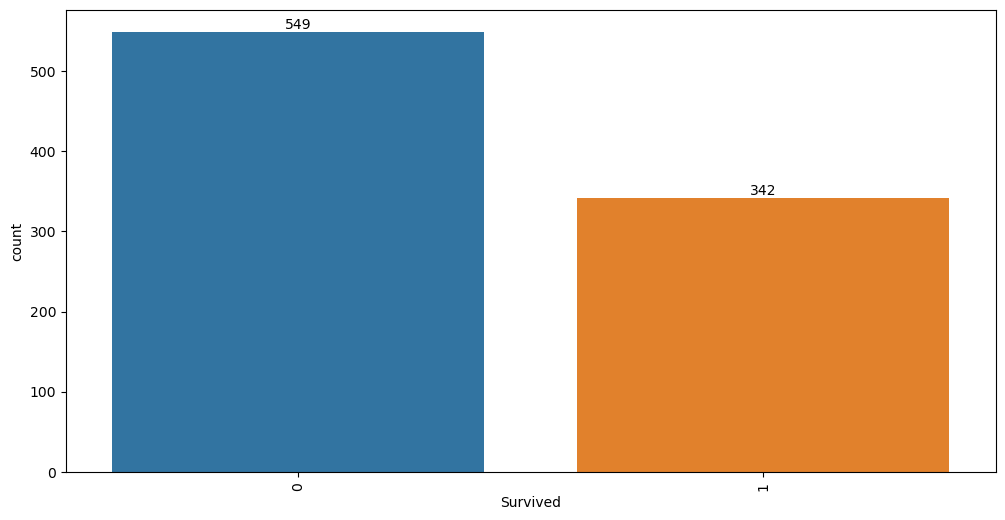

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `Survived` >= `0.5`**

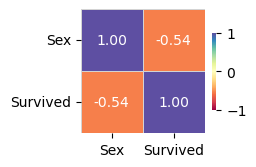

**Feature interaction between `Sex`/`Survived` in `train_data`**

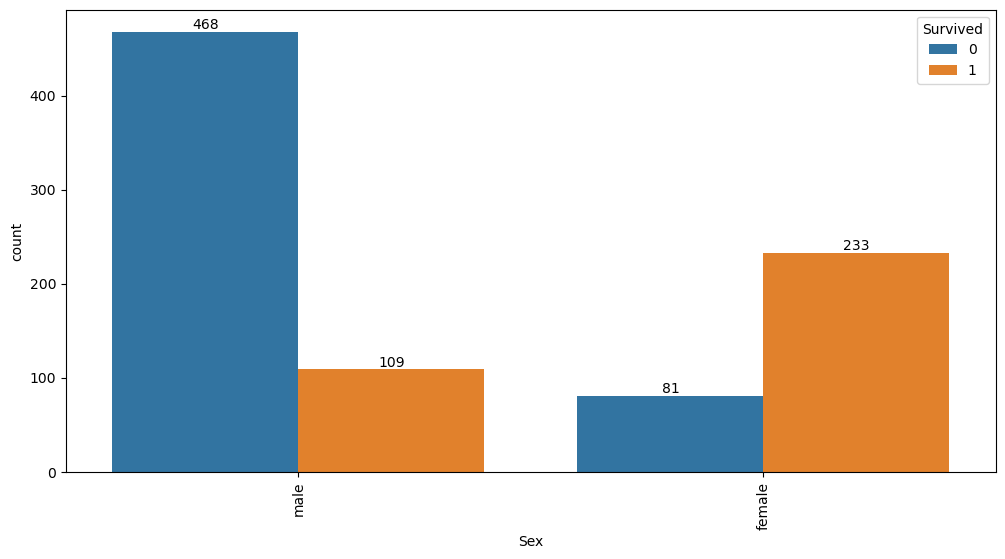

In [8]:
auto.target_analysis(train_data=train, label=label)

No path specified. Models will be saved in: "AutogluonModels/ag-20230328_234147/"


### Model Prediction for Survived

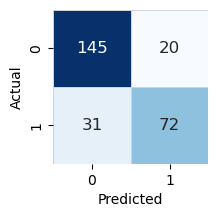

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.809701,0.856,0.003917,0.003803,0.727951,0.003917,0.003803,0.727951,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
Sex,0.112687,0.013033,0.000021,5,0.139522,0.085851
Name,0.055970,0.009140,0.000082,5,0.074789,0.037151
SibSp,0.026119,0.010554,0.002605,5,0.047850,0.004389
Fare,0.012687,0.009730,0.021720,5,0.032721,-0.007348
Embarked,0.011194,0.006981,0.011525,5,0.025567,-0.003179
Age,0.010448,0.003122,0.000853,5,0.016876,0.004020
PassengerId,0.008955,0.005659,0.012022,5,0.020607,-0.002696
Cabin,0.002985,0.006675,0.186950,5,0.016729,-0.010758
Pclass,0.002239,0.005659,0.213159,5,0.013890,-0.009413
Parch,0.001493,0.002044,0.088904,5,0.005701,-0.002716


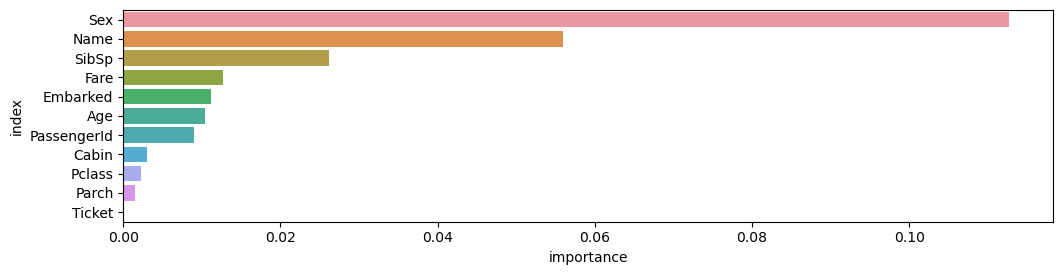

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,0,1,error
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0,0.046788,0.953212,0.953212
267,268,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S,1,0.932024,0.067976,0.932024
569,570,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S,1,0.922265,0.077735,0.922265
283,284,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S,1,0.921180,0.078820,0.921180
821,822,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S,1,0.919709,0.080291,0.919709
301,302,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q,1,0.918546,0.081454,0.918546
288,289,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S,1,0.907043,0.092957,0.907043
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1,0.906803,0.093197,0.906803
127,128,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,1,0.906605,0.093395,0.906605
391,392,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S,1,0.905367,0.094633,0.905367


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,0,1,score_diff
182,183,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,0,0.503872,0.496128,0.007743
475,476,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0,0.509178,0.490822,0.018356
347,348,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,1,0.510786,0.489214,0.021572
192,193,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,1,0.512167,0.487833,0.024334
330,331,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q,1,0.478502,0.521498,0.042996
572,573,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S,1,0.478234,0.521766,0.043532
792,793,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0,0.525041,0.474959,0.050082
172,173,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,1,0.526793,0.473207,0.053585
328,329,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S,1,0.531574,0.468426,0.063149
593,594,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,0,0.463840,0.536160,0.072319


In [9]:
auto.quick_fit(train, label, show_feature_importance_barplots=True)

### Missing Values Analysis

,missing_count,missing_ratio
Age,177,0.198653
Cabin,687,0.771044
Embarked,2,0.002245


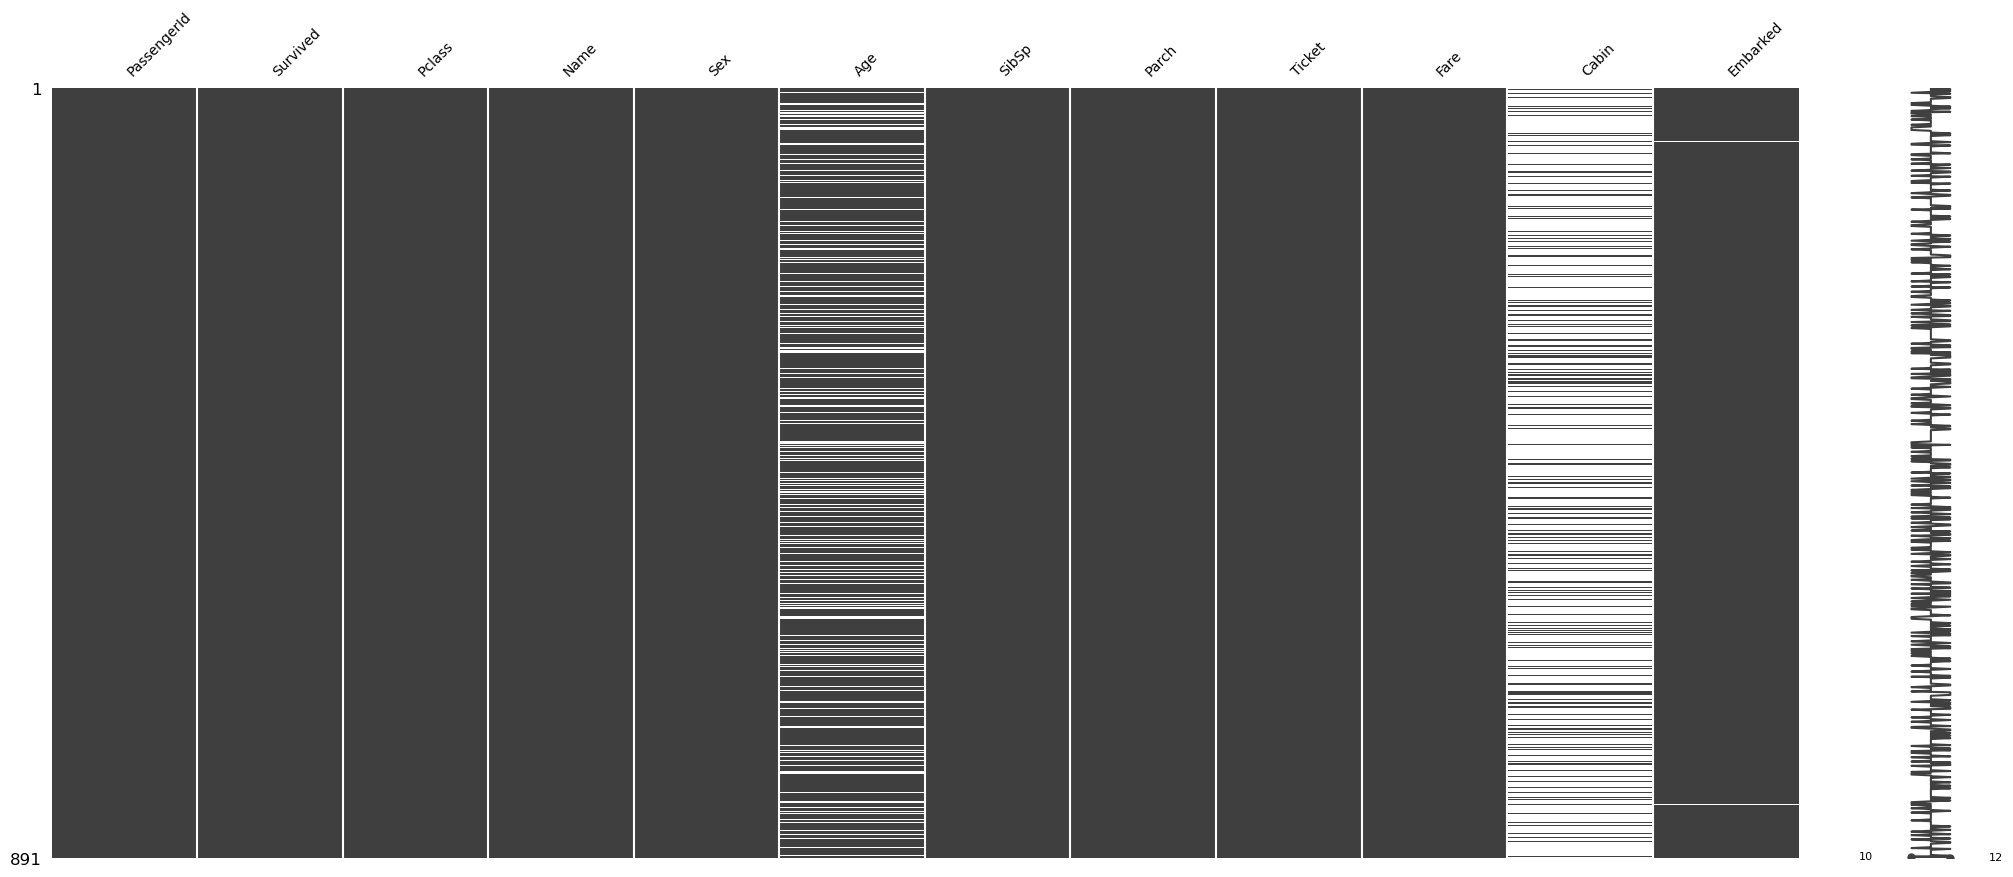

In [10]:
auto.missing_values_analysis(train_data=train)

In [ ]:
label = 'Survived'             # target variable
time_limit = 3600*4            # Evaluation Metric 
eval_metric = 'accuracy'         # eval_metric options below
ignored_columns = ['id', 'Ticket']

#predictor = TabularPredictor(label=label, eval_metric=eval_metric,learner_kwargs={'ignored_columns':ignored_columns}).fit(train)

predictor = TabularPredictor(label=label, eval_metric=eval_metric, learner_kwargs={'ignored_columns':ignored_columns}).fit(train, presets=['best_quality'], time_limit=time_limit)

submission = pd.read_csv(directory + 'gender_submission.csv')
submission[label] = predictor.predict(test)
submission.to_csv('submission.csv', index=False)
submission.head()

No path specified. Models will be saved in: "AutogluonModels/ag-20230328_234419/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 14400s
AutoGluon will save models to "AutogluonModels/ag-20230328_234419/"
AutoGluon Version:  0.7.0
Python Version:     3.10.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Dec 8 01:29:11 UTC 2022
Train Data Rows:    891
Train Data Columns: 11
Label Column: Survived
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Gener